In [39]:
from readCPython import load_C_output
from getXi1 import find_root
import pathlib

from convertToPhysical import *
plt.style.use(pubStyle)

In [48]:
def convert(filename):
    state, metadata = load_C_output(filename)
    xi1, thetaXi1 = find_root(state[0], state[1])
    dthetaXdxi1, _ = find_root(state[2], state[1])
    
    # Select only the portion of the the solution less than the radius of the star
    conditional = state[0] <= xi1
    
    xi = state[0][conditional]
    theta = state[1][conditional]
    dtheta = state[2][conditional]
    
    M = 2e33
    R = 7e10
    n = metadata['n']
    
    radius = get_radius(R, xi, xi1)
    mu = get_mu(0.735, 0.248, 0.017)
    
    # Scale quantities to physical
    rho = get_density(M, R, xi1, theta, dthetaXdxi1, n)
    P = get_P(M, R, xi, theta, dtheta, xi1, dthetaXdxi1, n)
    T = get_T(M, R, xi, theta, dtheta, xi1, dthetaXdxi1, n, mu)
    
    
    output = np.array([xi, theta, dtheta, radius, rho, P, T])
    return output, n

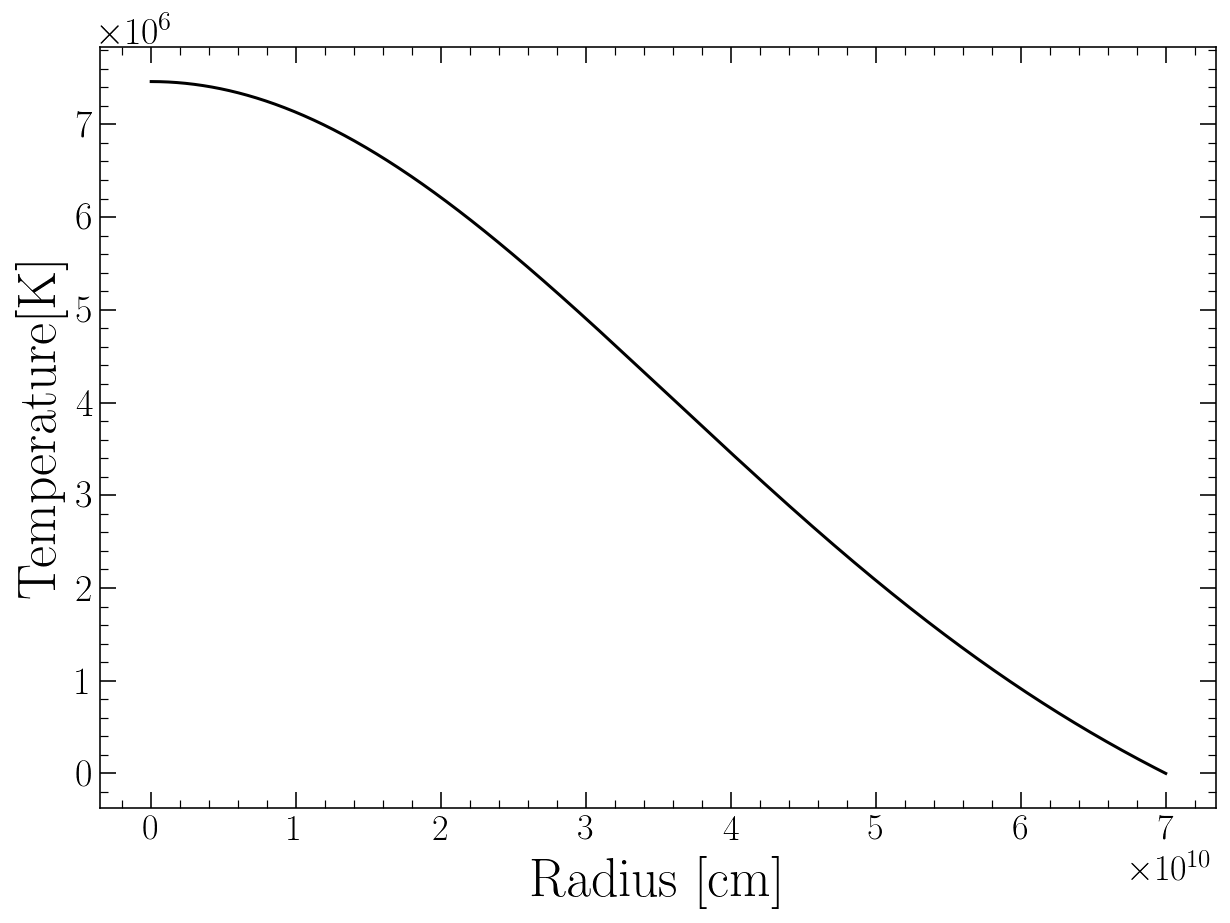

In [38]:
fig, ax = plt.subplots(1,1,figsize=(10, 7))
ax.plot(output[3, :], output[6, :], 'k')
ax.set_xlabel("Radius [cm]", fontsize=27)
ax.set_ylabel("Temperature[K]", fontsize=27)
fig.savefig("Figures/PolytropeTempProfile15.pdf")

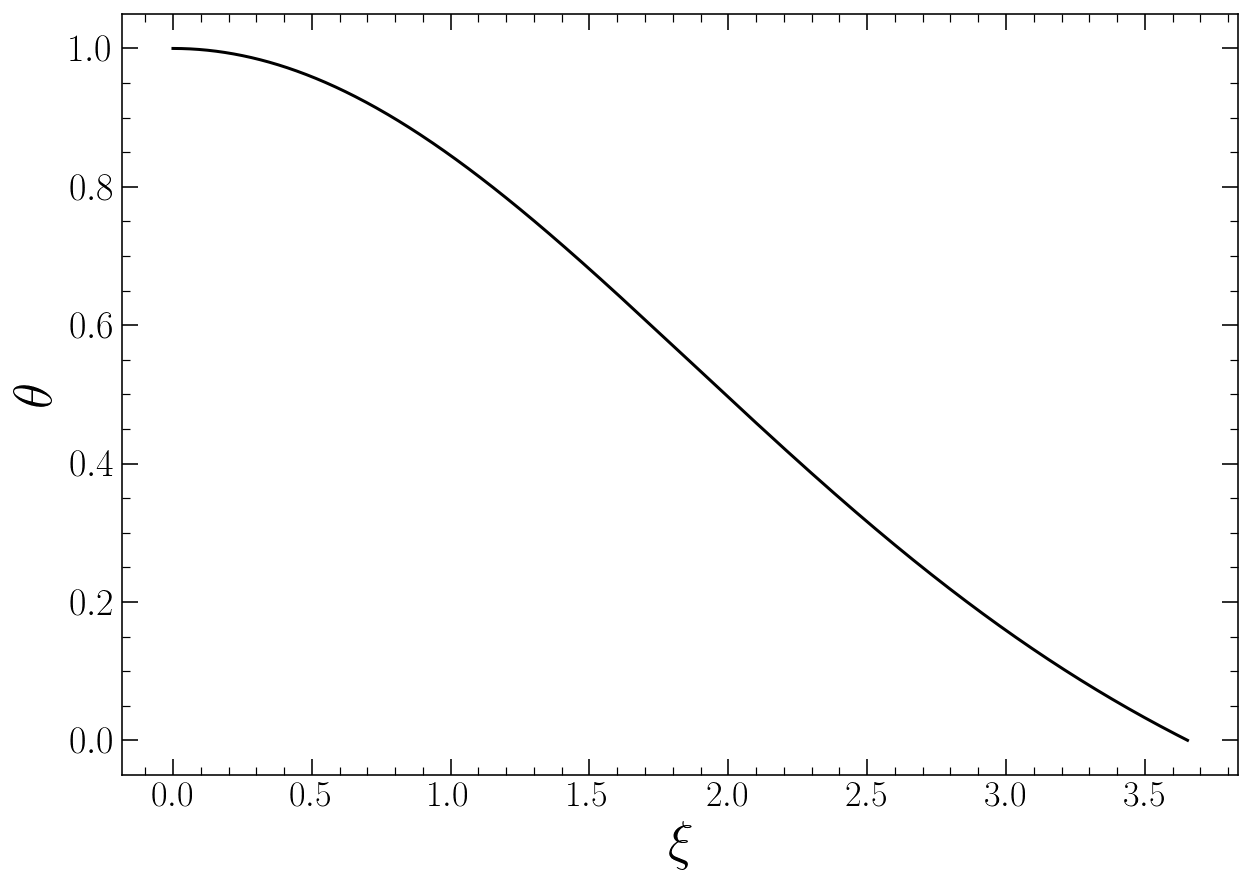

In [36]:
fig, ax = plt.subplots(1,1,figsize=(10, 7))
ax.plot(output[0], output[1], 'k')
ax.set_xlabel(r"$\xi$", fontsize=27)
ax.set_ylabel(r"$\theta$", fontsize=27)
fig.savefig("Figures/Polytrope.pdf")

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10, 7))
for file in pathlib.Path(".").rglob("*.dat"):
    output, n = convert(file)
    ax.plot(output[0], output[1], label=n)
    ax.set_xlabel(r"$\xi$", fontsize=27)
    ax.set_ylabel(r"$\theta$", fontsize=27)
# fig.savefig("Figures/runofp.pdf")
ax.legend()

/mnt/Documents/Emily/GraduateSchool/Doctorate/Thesis/thesis/Notebooks/convertToPhysical.py:40: RuntimeWarning: invalid value encountered in power
  return get_central_density(M, R, xi1, dthetaXdxi1)*np.power(theta, n)
/mnt/Documents/Emily/GraduateSchool/Doctorate/Thesis/thesis/Notebooks/convertToPhysical.py:103: RuntimeWarning: invalid value encountered in power
  return K*(get_central_density(M, R, xi1, dthetaXdxi1)**(1+1/n))*theta**(n+1)
/mnt/Documents/Emily/GraduateSchool/Doctorate/Thesis/thesis/Notebooks/convertToPhysical.py:40: RuntimeWarning: invalid value encountered in power
  return get_central_density(M, R, xi1, dthetaXdxi1)*np.power(theta, n)
/mnt/Documents/Emily/GraduateSchool/Doctorate/Thesis/thesis/Notebooks/convertToPhysical.py:103: RuntimeWarning: invalid value encountered in power
  return K*(get_central_density(M, R, xi1, dthetaXdxi1)**(1+1/n))*theta**(n+1)
/mnt/Documents/Emily/GraduateSchool/Doctorate/Thesis/thesis/Notebooks/convertToPhysical.py:40: RuntimeWarning: i

In [42]:
state, metadata = load_C_output("laneEmdenDataFile_1.400000-nonDegenerate.dat")

In [45]:
metadata

{'h': 1e-05, 'n': 1.4, 'num': 500000.0, 'xi0': 1e-07, 'xif': 5.0}